In [15]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Reds')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=16, fontweight='bold')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.figure(1)
    plt.tight_layout()
#     plt.ylabel('True label')
   #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

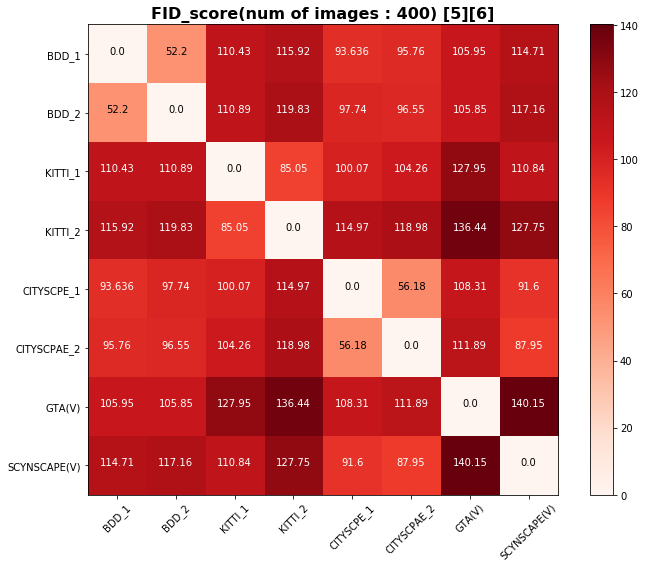

In [16]:
plot_confusion_matrix(cm           = np.array([[ 0, 52.20, 110.43, 115.92, 93.636, 95.76, 105.95, 114.71],
                                              [ 52.20, 0, 110.89, 119.83, 97.74, 96.55, 105.85, 117.16],
                                              [ 110.43, 110.89, 0, 85.05, 100.07, 104.26, 127.95, 110.84],
                                               [ 115.92, 119.83, 85.05, 0, 114.97, 118.98, 136.44, 127.75],
                                              [ 93.636, 97.74, 100.07, 114.97, 0, 56.18, 108.31, 91.60],
                                              [ 95.76, 96.55, 104.26, 118.98, 56.18, 0, 111.89, 87.95],
                                              [ 105.95, 105.85, 127.95, 136.44, 108.31, 111.89, 0, 140.15],
                                               [ 114.71, 117.16, 110.84, 127.75, 91.60, 87.95, 140.15, 0]]),
                      normalize    = False,
                      target_names = ['BDD_1', 'BDD_2', 'KITTI_1','KITTI_2','CITYSCPE_1','CITYSCPAE_2','GTA(V)','SCYNSCAPE(V)'],
                      title        = "FID_score(num of images : 400) [5][6]")